<a href="https://colab.research.google.com/github/Deeksha0209/Entertainment-EDA-Viz/blob/main/Entertainer_Info_UM_Internship_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Let's start with importing the required libraries. Seaborn & matplotlib are used for data visualizations.
#Loading dtaframes for excel files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('/content/drive/MyDrive/Entertainer - Basic Info.xlsx')

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Entertainer - Breakthrough Info.xlsx')

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/Entertainer - Last work Info.xlsx')

In [ ]:
#Display the top 2 entries for each df!
df.head(2)

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975


In [ ]:
df1.head(2)

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0


In [ ]:
df2.head(2)

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN


In [ ]:
#display bottom 2 entries for each df!
df.tail(2)

,Entertainer,Gender (traditional),Birth Year
68,Will Smith,M,1968
69,Willie Nelson,M,1933


In [ ]:
df1.tail(2)

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
68,Will Smith,1990,The Fresh Prince of Bel-Air,1988.0
69,Willie Nelson,1975,Red Headed Stranger,1976.0


In [ ]:
df2.tail(2)

,Entertainer,Year of Last Major Work (arguable),Year of Death
68,Will Smith,2016,NaN
69,Willie Nelson,2016,NaN


In [ ]:
#Let's display the no of rows & columns for each df!
df.shape

(70, 3)

In [ ]:
#.info() displays the information for each df!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entertainer           70 non-null     object
 1   Gender (traditional)  70 non-null     object
 2   Birth Year            70 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [ ]:
df1.shape

(70, 4)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 2   Breakthrough Name                             70 non-null     object 
 3   Year of First Oscar/Grammy/Emmy               64 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [ ]:
df2.shape

(70, 3)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entertainer                         70 non-null     object 
 1   Year of Last Major Work (arguable)  70 non-null     int64  
 2   Year of Death                       30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


#Description of datasets!

We have 3 datasets representing various columns for Entertainment Data. columns include Name of entertainers, Gender, Birth Year, Year of First Grammy/Oscar, Year of 1st nomination and also the Year of Last Major Work.We shall be cleaning each dataframe individually and later merge all 3 of them to get a final df.

# **#Data Cleaning for Each Dataframe**

In [ ]:
#First df doesn't contain any null values.
df.isna().sum()

Entertainer             0
Gender (traditional)    0
Birth Year              0
dtype: int64

In [ ]:
#For 2nd df, there are 6 na values in 1 column.
df1.isna().sum()

Entertainer                                     0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 6
dtype: int64

In [ ]:
#For the third df, we have 40 na values in 1 column! That's a lot of na values - we shall be cleaning these null values.
df2.isna().sum()

Entertainer                            0
Year of Last Major Work (arguable)     0
Year of Death                         40
dtype: int64

In [ ]:
#Dropping rows with na values
df1.dropna(subset=['Year of First Oscar/Grammy/Emmy'], inplace=True)

In [ ]:
#Dropping the column containing na values.
df2 = df2.drop('Year of Death', axis=1)

In [ ]:
#merging all 3 DFs! We shall get our final df.

merge_df = pd.merge(df, df1, on ='Entertainer', how='left')
final_df = pd.merge(merge_df, df2, on='Entertainer', how='left')

In [ ]:
#Let's take a look at our merged final df
final_df.shape

(70, 7)

In [ ]:
#Let's check na values for our final merged df!
final_df.isna().sum()

Entertainer                                     0
Gender (traditional)                            0
Birth Year                                      0
Year of Breakthrough/#1 Hit/Award Nomination    6
Breakthrough Name                               6
Year of First Oscar/Grammy/Emmy                 6
Year of Last Major Work (arguable)              0
dtype: int64

In [ ]:
#Performing data cleaning on final df
final_df.dropna(subset=['Year of First Oscar/Grammy/Emmy', 'Breakthrough Name', 'Year of Breakthrough/#1 Hit/Award Nomination'], inplace=True)

In [ ]:
#checking for duplicates in our final df
final_df=final_df.drop_duplicates()
final_df.duplicated().sum()

0

In [ ]:
#Shall we check data types for each column
final_df.dtypes

Entertainer                                      object
Gender (traditional)                             object
Birth Year                                        int64
Year of Breakthrough/#1 Hit/Award Nomination    float64
Breakthrough Name                                object
Year of First Oscar/Grammy/Emmy                 float64
Year of Last Major Work (arguable)                int64
dtype: object

In [ ]:
#Converting data type to correct format for numeric columns
final_df['Year of Breakthrough/#1 Hit/Award Nomination'] = final_df['Year of Breakthrough/#1 Hit/Award Nomination'].astype(int)
final_df['Year of First Oscar/Grammy/Emmy'] = final_df['Year of First Oscar/Grammy/Emmy'].astype(int)

In [ ]:
#Displaying information about our final df!
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 69
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Entertainer                                   64 non-null     object
 1   Gender (traditional)                          64 non-null     object
 2   Birth Year                                    64 non-null     int64 
 3   Year of Breakthrough/#1 Hit/Award Nomination  64 non-null     int64 
 4   Breakthrough Name                             64 non-null     object
 5   Year of First Oscar/Grammy/Emmy               64 non-null     int64 
 6   Year of Last Major Work (arguable)            64 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 4.0+ KB


# **#EDA on final_df**

In [ ]:
#Checking unique values for Entertainer column
Entertainer_df= df['Entertainer'].nunique()
Entertainer_df

70

In [ ]:
#Checking unique values for Breakthrough Name for each value
Breakthrough_df= final_df['Breakthrough Name'].nunique()
Breakthrough_df

63

In [ ]:
#Displaying the minimum, maximum and median values for various numerical columns
minimum_birthYear = final_df['Birth Year'].min()
print("Minimum Birth Year:", minimum_birthYear)
maximum_year = final_df['Year of Last Major Work (arguable)'].max()
print("Maximum Year:", maximum_year)
median_year = final_df['Year of Breakthrough/#1 Hit/Award Nomination'].median()

print("\nMedian of column 'Year of Breakthrough/#1 Hit/Award Nomination':")
print(median_year)

Minimum Birth Year: 1889
Maximum Year: 2016

Median of column 'Year of Breakthrough/#1 Hit/Award Nomination':
1963.5


** Bivariate & Multivariate Analysis!**

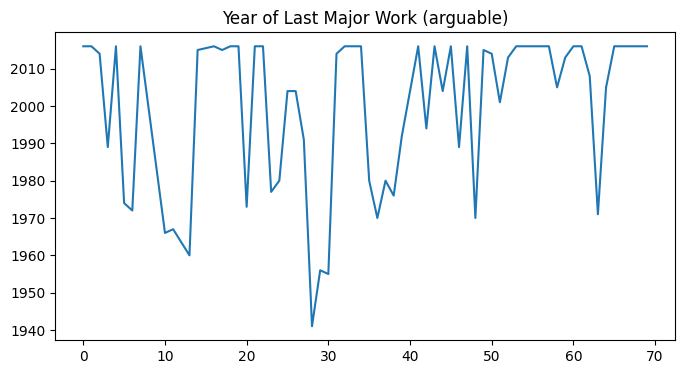

In [ ]:
#Univariate analysis of Major works done over the years!
final_df['Year of Last Major Work (arguable)'].plot(kind='line', figsize=(8, 4), title='Year of Last Major Work (arguable)')
plt.show()

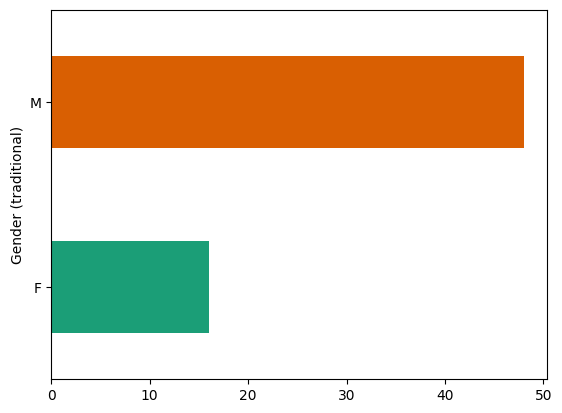

In [ ]:
#Univariate analysis of Count of Genders
import seaborn as sns
final_df.groupby('Gender (traditional)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

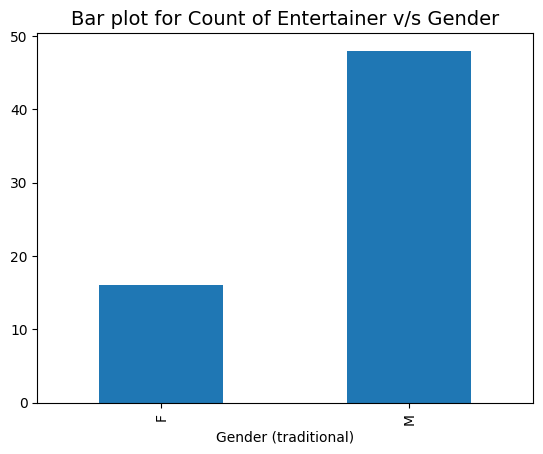

In [ ]:
#Let's display a bar plot count for bivariate analysis
final_df.groupby('Gender (traditional)')['Entertainer'].count().plot(kind='bar')
plt.title('Bar plot for Count of Entertainer v/s Gender', fontsize=14)
plt.show()

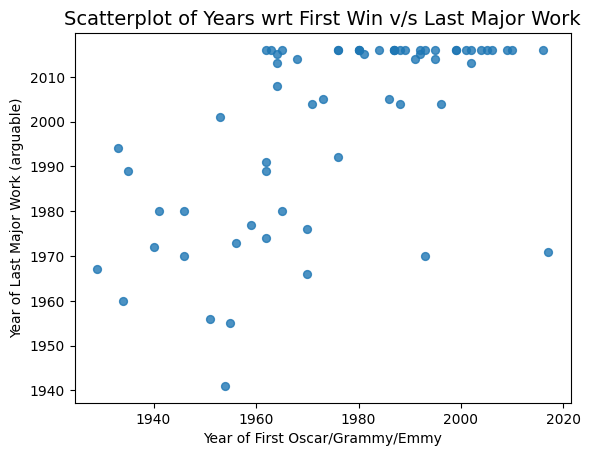

In [ ]:
# Bi variate Analysis of Year of First Oscar/Grammy/Emmy vs Year of Last Major Work (arguable)

final_df.plot(kind='scatter', x='Year of First Oscar/Grammy/Emmy', y='Year of Last Major Work (arguable)', s=32, alpha=.8)
plt.title('Scatterplot of Years wrt First Win v/s Last Major Work', fontsize=14)
plt.show()

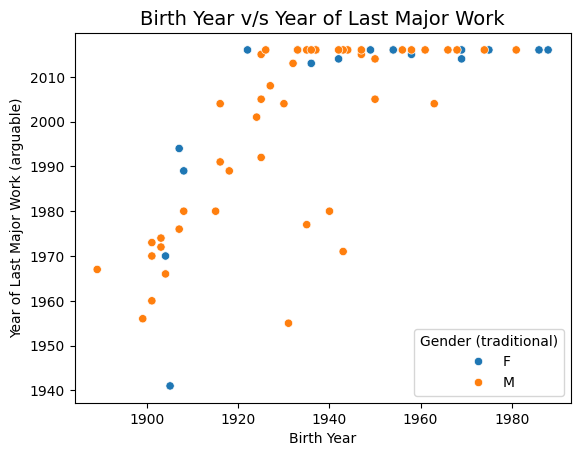

In [ ]:
#Bivariate Analysis of Year of Last Major Work vs. Birth Year

sns.scatterplot(x="Birth Year", y="Year of Last Major Work (arguable)", hue="Gender (traditional)", data=final_df)
plt.title('Birth Year v/s Year of Last Major Work', fontsize=14)
plt.show()

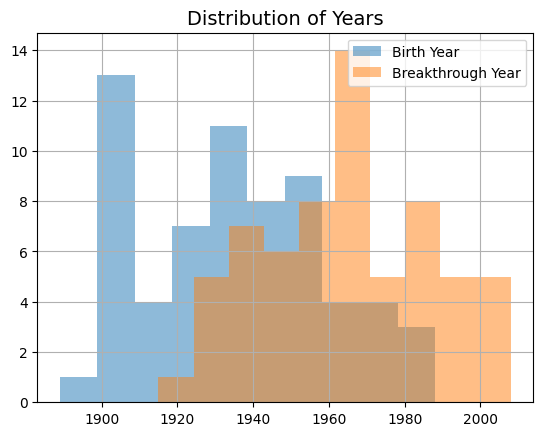

In [ ]:
#Distribution of Birth Years vs. Breakthrough Years

final_df['Birth Year'].hist(alpha=0.5, label='Birth Year')
final_df['Year of Breakthrough/#1 Hit/Award Nomination'].hist(alpha=0.5, label='Breakthrough Year')
_ = plt.legend(loc='upper right')
plt.title('Distribution of Years', fontsize=14)
plt.show()

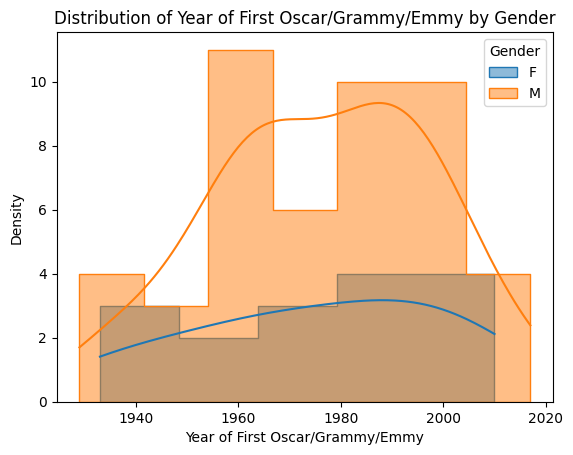

In [ ]:
for group, subset in final_df.groupby('Gender (traditional)'):
    sns.histplot(subset['Year of First Oscar/Grammy/Emmy'], kde=True, label=f'{group}', element="step")

plt.legend(title='Gender')  # Add legend with title
plt.title('Distribution of Year of First Oscar/Grammy/Emmy by Gender')
plt.xlabel('Year of First Oscar/Grammy/Emmy')
plt.ylabel('Density')
plt.show()

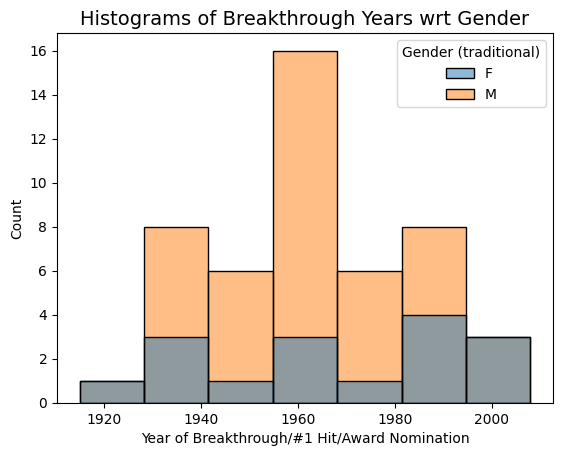

In [ ]:
#Distribution of Breakthrough Years by Gender

sns.histplot(data=final_df, x="Year of Breakthrough/#1 Hit/Award Nomination", hue="Gender (traditional)")
plt.title('Histograms of Breakthrough Years wrt Gender', fontsize=14)
plt.show()

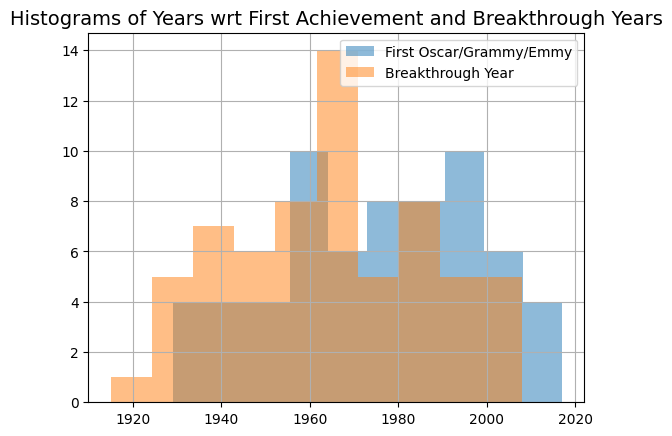

In [ ]:
#Lets take a look at tehdistributions for Years wrt First Achievement and Breakthrough Year
final_df['Year of First Oscar/Grammy/Emmy'].hist(alpha=0.5, label='First Oscar/Grammy/Emmy')
final_df['Year of Breakthrough/#1 Hit/Award Nomination'].hist(alpha=0.5, label='Breakthrough Year')
_ = plt.legend(loc='upper right')
plt.title('Histograms of Years wrt First Achievement and Breakthrough Years', fontsize=14)
plt.show()

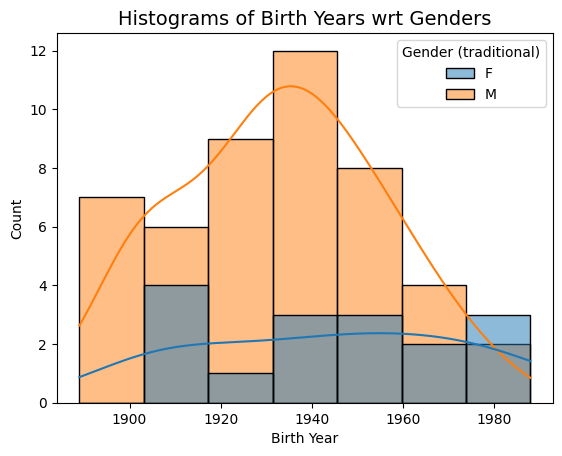

In [ ]:
#Lets take a look at histograms wrt gender
sns.histplot(data=final_df, x="Birth Year", hue="Gender (traditional)", kde=True)
plt.title('Histograms of Birth Years wrt Genders', fontsize=14)
plt.show()

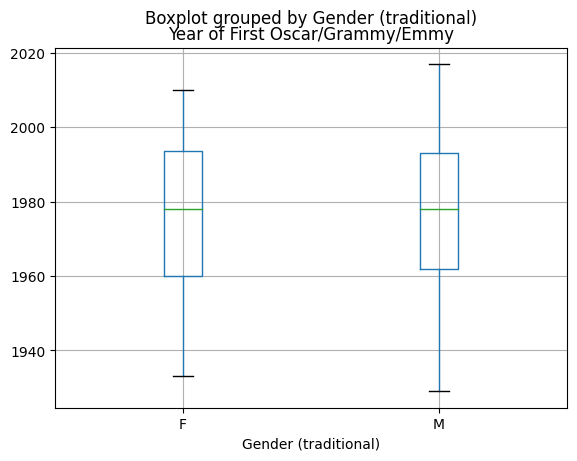

In [ ]:
#Let's display boxplots for further analysis of median, quartile values and outliers!
final_df.boxplot(column='Year of First Oscar/Grammy/Emmy', by='Gender (traditional)')
plt.show()

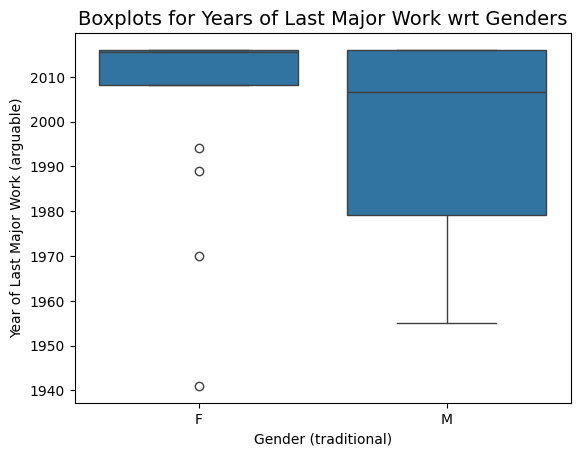

In [ ]:
##Let's display boxplots for further analysis of median, quartile values and outliers!

sns.boxplot(x="Gender (traditional)", y="Year of Last Major Work (arguable)", data=final_df)
plt.title('Boxplots for Years of Last Major Work wrt Genders', fontsize=14)
plt.show()

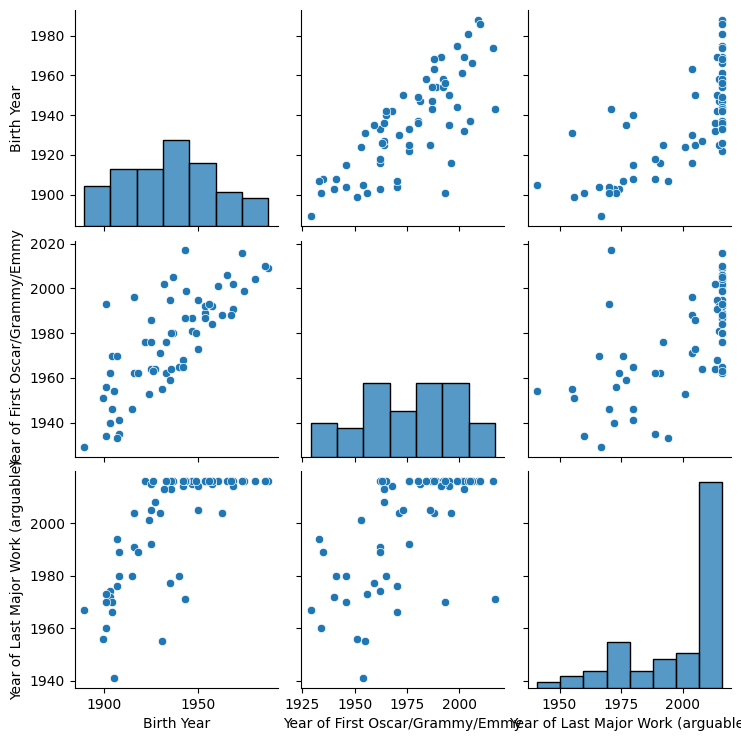

In [ ]:
#Lets display pairplots for various columns! Used as a popular method for multivariate analysis.
sns.pairplot(final_df[['Birth Year', 'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)']])
plt.show()

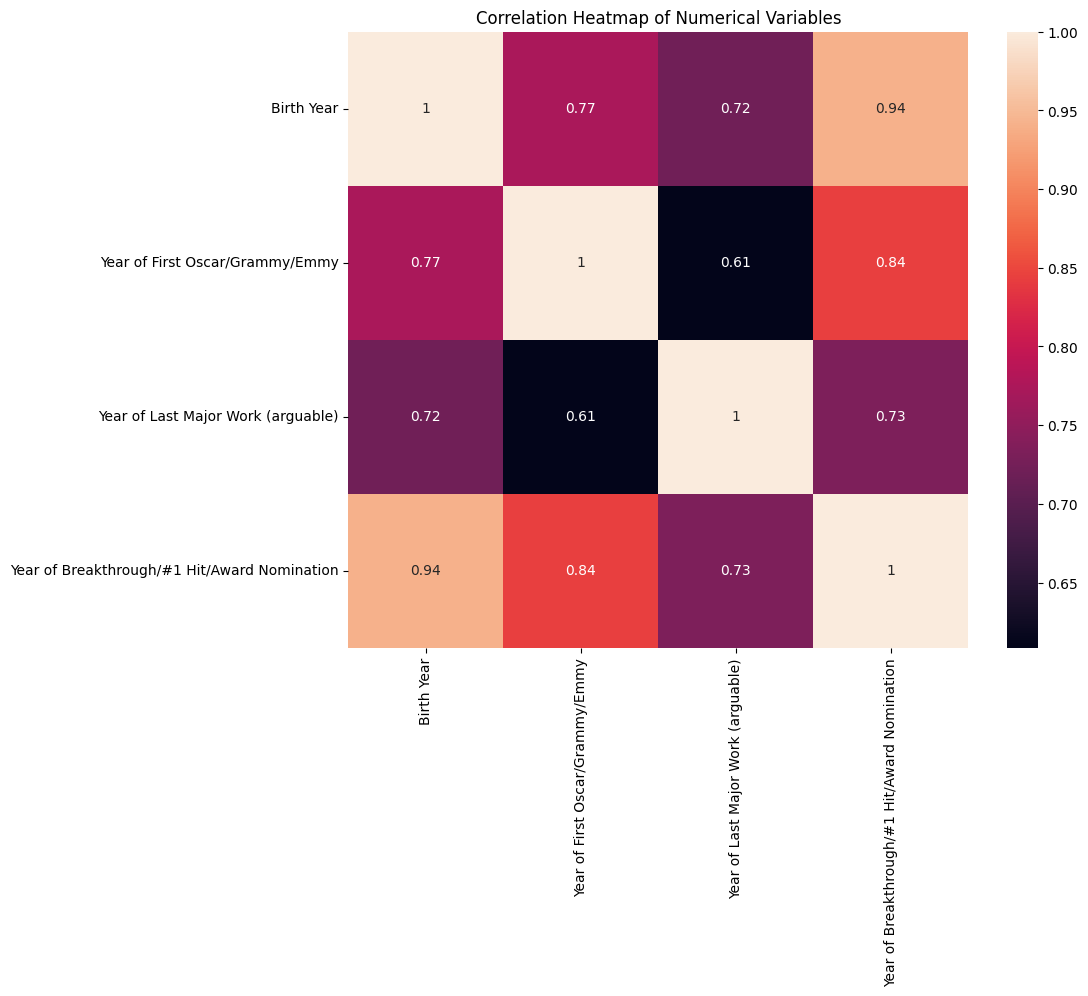

In [ ]:
#Correlation matrix is used for multivariate analysis & displays the correlation between numerical columns.
#Correlation ranges from -1 to +1.

numerical_columns = ['Birth Year', 'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)', 'Year of Breakthrough/#1 Hit/Award Nomination']
correlation_matrix = final_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="rocket")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
#now i will save this df to csv!
#file_path = 'C:\Users\Deeksha\Desktop\DEEKSHA INTERNSHIP DOCS'
#df.to_csv(file_path, index=False)

final_df.to_csv('/content/EntertainerDf.csv', index=False)